<a href="https://colab.research.google.com/github/pacomath/projetos/blob/main/projetodeeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


In [ ]:
dataset, info = tfds.load("uc_merced", as_supervised = True, with_info=True)
dataset_size = info.splits["train"].num_examples
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2100 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/uc_merced/2.0.0.incompleteQWSE0P/uc_merced-train.tfrecord*...:   0%|      …

Dataset uc_merced downloaded and prepared to /root/tensorflow_datasets/uc_merced/2.0.0. Subsequent calls will reuse this data.


In [ ]:
tfds.disable_progress_bar()

# Carregamento e divisao do conjunto de dados
train_ds, validation_ds, test_ds = tfds.load(
    "uc_merced",
    split=["train[:70%]", "train[70%:85%]", "train[85%:100%]"],
    as_supervised=True,
)

num_classes = 21

# Função de pré-processamento do conjunto de treinamento
def preprocess_train(image, label):
    image = tf.image.resize(image, (150, 150))
    image = image / 255.0  # Normalização
    label = tf.one_hot(label, depth=num_classes)
    return image, label

# Aplicação do pré-processamento aos conjuntos de treino, validação e teste
train_ds = train_ds.map(preprocess_train)
validation_ds = validation_ds.map(preprocess_train)
test_ds = test_ds.map(preprocess_train)

# Carregamento do modelo VGG16 pré-treinado
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Configuração do conjunto de treino
train_ds = train_ds.shuffle(buffer_size=1000).batch(32).prefetch(tf.data.AUTOTUNE)

# Configuração do conjunto de validação
validation_ds = validation_ds.batch(32).prefetch(tf.data.AUTOTUNE)

# Configuração do conjunto de teste
test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)

# Congelamento das camadas convolucionais da VGG
for layer in base_model.layers:
    layer.trainable = False

# Criação do modelo
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compilação do modelo
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo
hist = model.fit(train_ds,
                 epochs=10,
                 validation_data=validation_ds,
                 steps_per_epoch=len(train_ds),
                 validation_steps=len(validation_ds))


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
46/46 [==============================] - 21s 164ms/step - loss: 1.6177 - accuracy: 0.5211 - val_loss: 0.6774 - val_accuracy: 0.7841
Epoch 2/10
46/46 [==============================] - 4s 81ms/step - loss: 0.5720 - accuracy: 0.8068 - val_loss: 0.5582 - val_accuracy: 0.8063
Epoch 3/10
46/46 [==============================] - 4s 80ms/step - loss: 0.3465 - accuracy: 0.8966 - val_loss: 0.4900 - val_accuracy: 0.8349
Epoch 4/10
46/46 [==============================] - 4s 80ms/step - loss: 0.2409 - accuracy: 0.9184 - val_loss: 0.4106 - val_accuracy: 0.8667
Epoch 5/10
46/46 [==============================] - 4s 82ms/step - loss: 0.1660 - accuracy: 0.9558 - val_loss: 0.4342 - val_accuracy: 0.8603
Epoch 6/10
46/46 [==============================] - 4s 81ms/step - loss: 0.1219 - accuracy: 0.9646 - val_loss: 0.4300 - val_accuracy: 0.8698
Epoch 7/10
46/46 [==============================] - 4s 81ms/step - loss: 0.0930 - accur

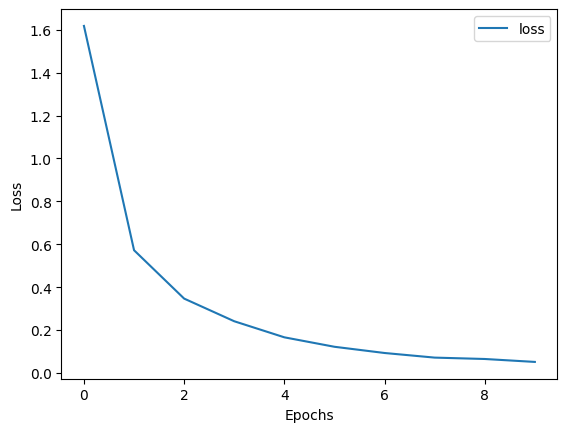

In [ ]:
for label in ["loss"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

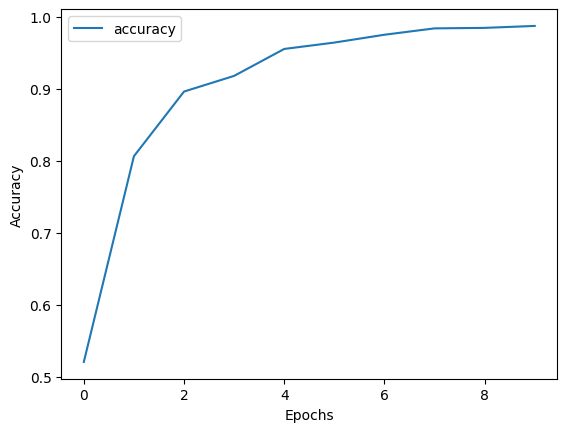

In [ ]:
for label in ["accuracy"]:
    plt.plot(hist.history[label], label=label)

# Adição de legendas e rótulos aos eixos
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Exibição do gráfico
plt.show()

In [ ]:
#Loss on training set
#Finding Loss on training set
loss_on_training_set = model.evaluate(train_ds, batch_size = 32)

# Imprimir a perda no conjunto de treinamento
print("Loss on training set =", loss_on_training_set[0])

46/46 [==============================] - 3s 68ms/step - loss: 0.0151 - accuracy: 0.9993
Loss on training set = 0.015092303045094013


In [ ]:
#Loss on test set
#Finding Loss on test set
loss_on_test_set = model.evaluate(test_ds, batch_size = 32)

# Imprimir a perda no conjunto de treinamento
print("Loss on testing set =", loss_on_test_set[0])

10/10 [==============================] - 1s 71ms/step - loss: 0.4979 - accuracy: 0.8635
Loss on testing set = 0.4978604316711426


Pixel values before normalization: 0.21568627655506134 - 0.7293683886528015
Pixel values before normalization: 0.10429015755653381 - 0.9536421895027161
Pixel values before normalization: 0.17317110300064087 - 0.9738510847091675
Pixel values before normalization: 0.05732547119259834 - 0.7481666803359985
Pixel values before normalization: 0.0 - 0.99082350730896
Pixel values before normalization: 0.3300524353981018 - 0.7809410691261292
Pixel values before normalization: 0.0 - 0.5517202615737915
Pixel values before normalization: 0.0 - 0.9837217926979065
Pixel values before normalization: 0.03106836788356304 - 0.9639788269996643


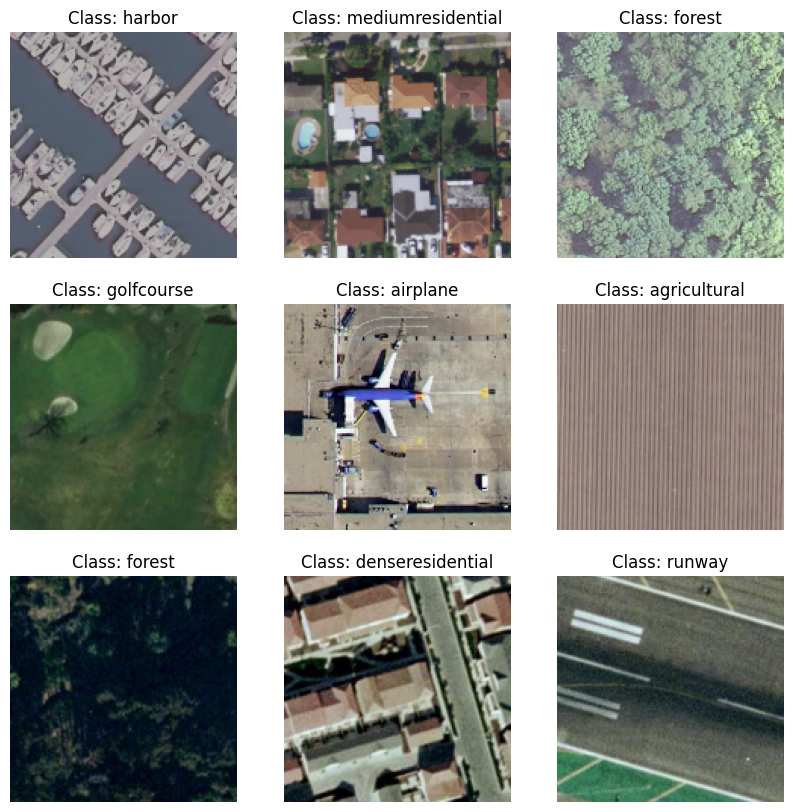

['agricultural',
 'airplane',
 'baseballdiamond',
 'beach',
 'buildings',
 'chaparral',
 'denseresidential',
 'forest',
 'freeway',
 'golfcourse',
 'harbor',
 'intersection',
 'mediumresidential',
 'mobilehomepark',
 'overpass',
 'parkinglot',
 'river',
 'runway',
 'sparseresidential',
 'storagetanks',
 'tenniscourt']

In [ ]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)


    # Exibe a imagem sem a necessidade de dividir por 255, se a normalização já foi aplicada
    plt.imshow(image[i].numpy())
    plt.title(f"Class: {class_names[tf.argmax(label[i]).numpy()]}", fontsize=12)  # Adiciona o título com a classe
    plt.axis("off")

plt.show()
class_names

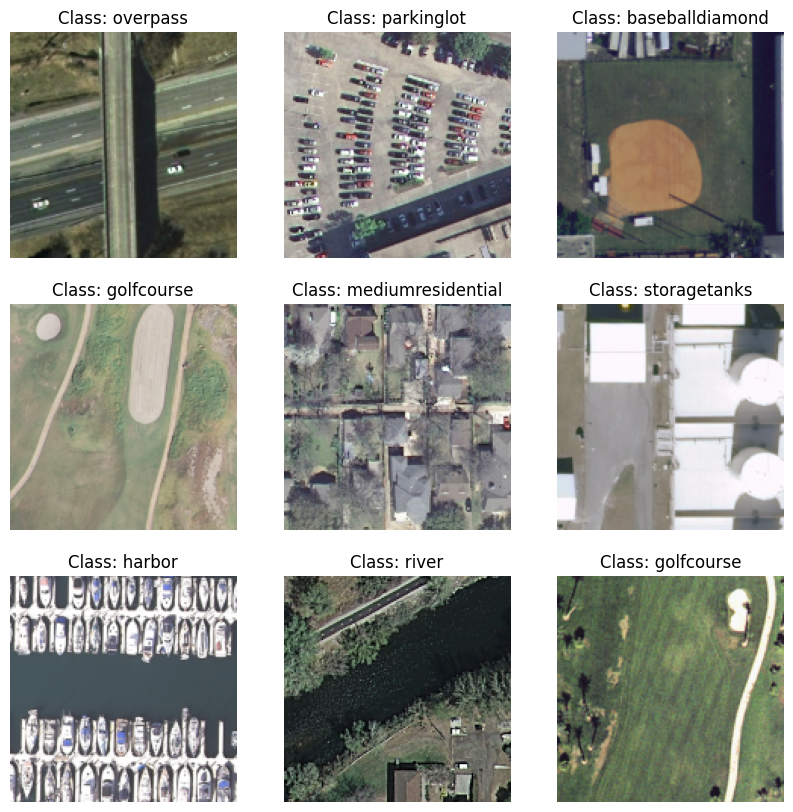

In [ ]:
shuffled_test_ds = test_ds.shuffle(buffer_size=1000)



plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(shuffled_test_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)


    # Exibe a imagem sem a necessidade de dividir por 255, se a normalização já foi aplicada
    plt.imshow(image[i].numpy())
    plt.title(f"Class: {class_names[tf.argmax(label[i]).numpy()]}", fontsize=12)  # Adiciona o título com a classe
    plt.axis("off")

plt.show()
